In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Irish data

In [2]:
#reading in the Irish dataset
dfIe = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/EHQ10/CSV/1.0/en')
dfIe

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02741V03309,Sub Sector,UNIT,VALUE
0,EHQ10C01,Employment,20081,2008Q1,01,Civil service,Number,41700.00
1,EHQ10C01,Employment,20081,2008Q1,02,Defence,Number,11200.00
2,EHQ10C01,Employment,20081,2008Q1,03,Garda Siochana,Number,14900.00
3,EHQ10C01,Employment,20081,2008Q1,04,Education,Number,116100.00
4,EHQ10C01,Employment,20081,2008Q1,05,Regional bodies,Number,38900.00
...,...,...,...,...,...,...,...,...
5363,EHQ10C08,Average hourly total labour costs,20231,2023Q1,07,Semi-State companies,Euro,37.35
5364,EHQ10C08,Average hourly total labour costs,20231,2023Q1,09,Commercial Semi-State companies,Euro,37.74
5365,EHQ10C08,Average hourly total labour costs,20231,2023Q1,10,Non commercial Semi-State companies,Euro,36.47
5366,EHQ10C08,Average hourly total labour costs,20231,2023Q1,-,Total Public Sector including Semi State bodies,Euro,37.64


In [3]:
# removing white spaces from column names
dfIe.rename(columns={"Sub Sector": "Sub_Sector"}, inplace=True)
dfIe.rename(columns={"Statistic Label": "Statistic_Label"}, inplace=True)

In [4]:
#dropping unwanted columns
dfIe.drop(columns=['STATISTIC', 'TLIST(Q1)','C02741V03309'], inplace=True)

In [5]:
dfIe

,Statistic_Label,Quarter,Sub_Sector,UNIT,VALUE
0,Employment,2008Q1,Civil service,Number,41700.00
1,Employment,2008Q1,Defence,Number,11200.00
2,Employment,2008Q1,Garda Siochana,Number,14900.00
3,Employment,2008Q1,Education,Number,116100.00
4,Employment,2008Q1,Regional bodies,Number,38900.00
...,...,...,...,...,...
5363,Average hourly total labour costs,2023Q1,Semi-State companies,Euro,37.35
5364,Average hourly total labour costs,2023Q1,Commercial Semi-State companies,Euro,37.74
5365,Average hourly total labour costs,2023Q1,Non commercial Semi-State companies,Euro,36.47
5366,Average hourly total labour costs,2023Q1,Total Public Sector including Semi State bodies,Euro,37.64


In [6]:
dfIe['Statistic_Label'].unique()

array(['Employment', 'Average Weekly Earnings', 'Average Hourly Earnings',
       'Average Hourly Earnings excluding Irregular Earnings',
       'Average Weekly Paid Hours', 'Average hourly irregular earnings',
       'Average hourly other labour costs',
       'Average hourly total labour costs'], dtype=object)

In [7]:
dfIe['Sub_Sector'].unique()

array(['Civil service', 'Defence', 'Garda Siochana', 'Education',
       'Regional bodies', 'Health', 'Semi-State companies',
       'Commercial Semi-State companies',
       'Non commercial Semi-State companies',
       'Total Public Sector including Semi State bodies',
       'Total Public Sector excluding Semi State bodies'], dtype=object)

In [8]:
dfIe['UNIT'].unique()

array(['Number', 'Euro', 'Hours'], dtype=object)

In [9]:
dfIe['VALUE'].unique()

array([4.170e+04, 1.120e+04, 1.490e+04, ..., 3.774e+01, 3.764e+01,
       3.768e+01])

In [10]:
dfIe.describe()

,VALUE
count,5368.000000
mean,13814.342345
std,58776.196299
min,0.090000
25%,18.382500
50%,29.825000
75%,238.287500
max,450000.000000


In [11]:
dfIe.describe(include='object')

,Statistic_Label,Quarter,Sub_Sector,UNIT
count,5368,5368,5368,5368
unique,8,61,11,3
top,Employment,2008Q1,Civil service,Euro
freq,671,88,488,4026


In [12]:
#converting quarters to datetime data type
dfIe['Quarter'] = pd.to_datetime(dfIe['Quarter'])
dfIe['Quarter']

0      2008-01-01
1      2008-01-01
2      2008-01-01
3      2008-01-01
4      2008-01-01
          ...    
5363   2023-01-01
5364   2023-01-01
5365   2023-01-01
5366   2023-01-01
5367   2023-01-01
Name: Quarter, Length: 5368, dtype: datetime64[ns]

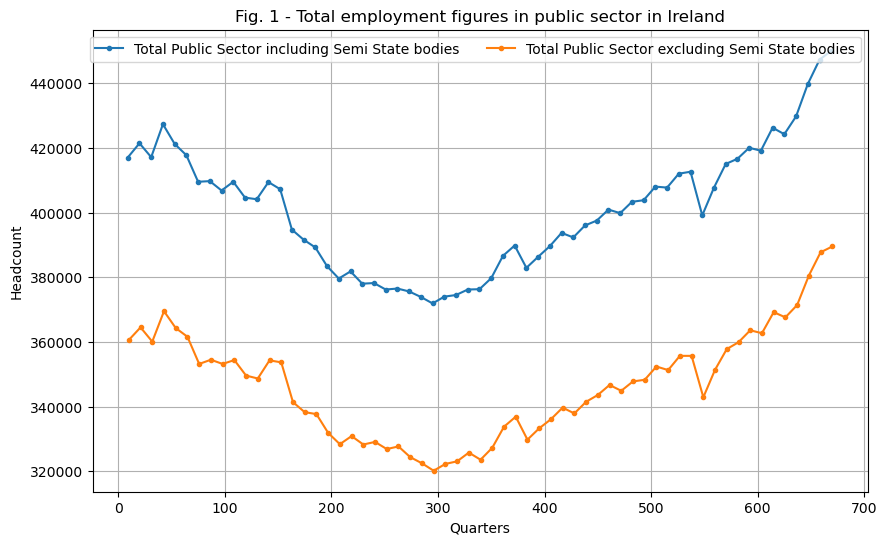

In [13]:
#selecting rows from df where Statistic_Label is value Employment
dfIe_employment = dfIe[dfIe['Statistic_Label'] == 'Employment']

# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining group with total figures
totalsEmployIE_group = ['Total Public Sector including Semi State bodies', 'Total Public Sector excluding Semi State bodies']

# looping through the group created 
for subsector in totalsEmployIE_group:
    df_subsector = dfIe_employment[dfIe_employment['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(df_subsector.index, df_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.title('Fig. 1 - Total employment figures in public sector in Ireland')
plt.grid(True) # showing grid for easier readability 

# Put the legend in the background
ax.legend(loc='best', ncol=2) # bbox_to_anchor takes the legend out of the plot

# Show the plot
plt.show()

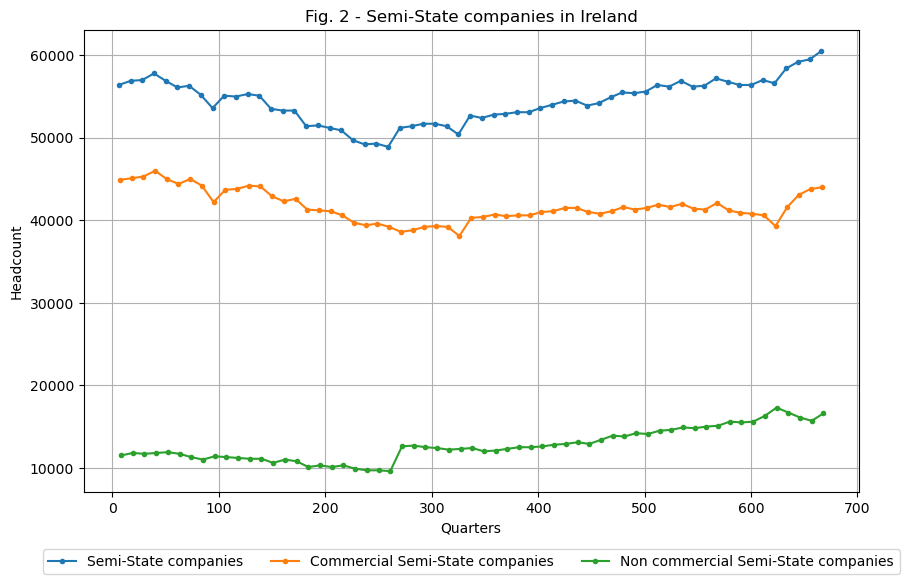

In [14]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining semi-state companies group
semiState_group = ['Semi-State companies', 'Commercial Semi-State companies', 'Non commercial Semi-State companies']

# looping through semiState_group 
for subsector in semiState_group:
    df_subsector = dfIe_employment[dfIe_employment['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(df_subsector.index, df_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.title('Fig. 2 - Semi-State companies in Ireland')
plt.grid(True) # showing grid for easier readability 

# Put the legend in the background
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3) # bbox_to_anchor takes the legend out of the plot

# Show the plot
plt.show()

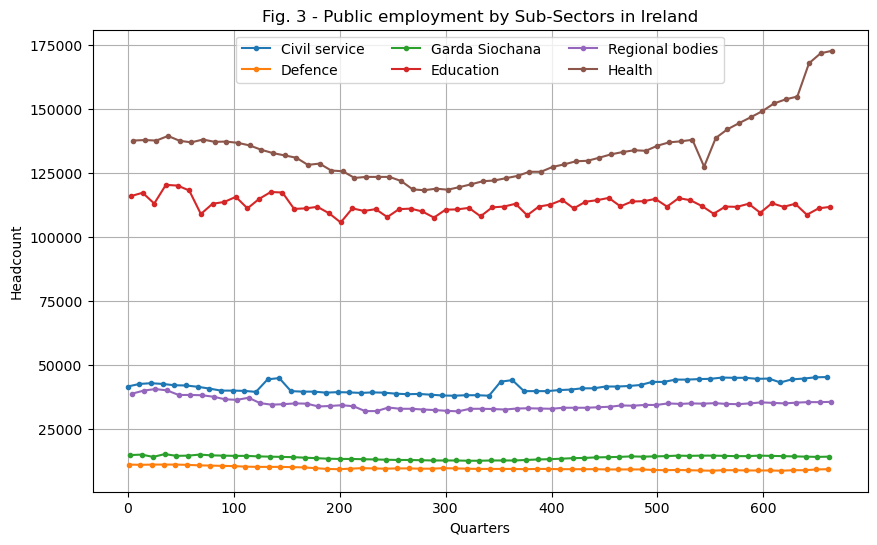

In [15]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining subsectors
subsectors = ['Civil service', 'Defence', 'Garda Siochana', 'Education', 'Regional bodies', 'Health']

#Looping through the Sub_Sectors in the group 
for subsector in subsectors:
    dfIe_subsector = dfIe_employment[dfIe_employment['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(dfIe_subsector.index, dfIe_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.title('Fig. 3 - Public employment by Sub-Sectors in Ireland')
plt.grid(True)

# Put the legend in the background
ax.legend(loc='upper center', ncol=3)

plt.show()

In [16]:
# creating dfs per subsector
civServ_EmpIe = dfIe_employment[dfIe_employment['Sub_Sector'] == 'Civil service']
regBod_EmpIe = dfIe_employment[dfIe_employment['Sub_Sector'] == 'Regional bodies']
defen_EmpIe = dfIe_employment[dfIe_employment['Sub_Sector'] == 'Defence']
garda_EmpIe = dfIe_employment[dfIe_employment['Sub_Sector'] == 'Garda Siochana']
educ_EmpIe = dfIe_employment[dfIe_employment['Sub_Sector'] == 'Education']
healthEmpIe = dfIe_employment[dfIe_employment['Sub_Sector'] == 'Health']

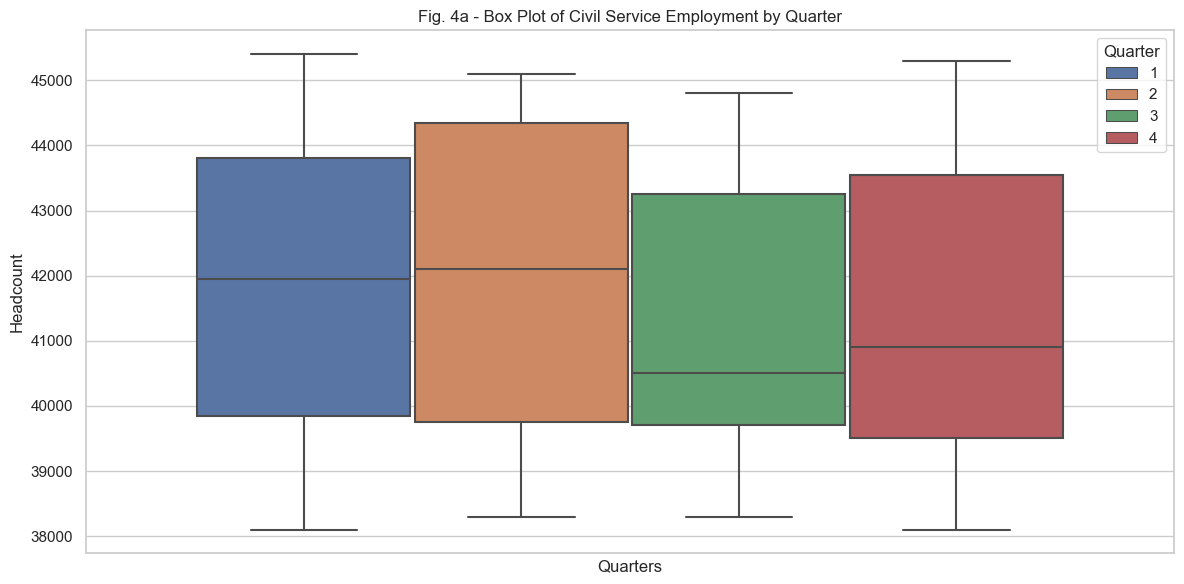

In [17]:
# setting style of seaborn
sns.set(style="whitegrid")

# creating a box plot for each of the quarters
plt.figure(figsize=(12, 6))
sns.boxplot(data=civServ_EmpIe, x='Sub_Sector', y='VALUE', hue=civServ_EmpIe['Quarter'].dt.quarter) #grouping by quarters
plt.title('Fig. 4a - Box Plot of Civil Service Employment by Quarter')
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.xticks([])  # removing x ticks
plt.tight_layout()
plt.legend(title='Quarter')
plt.show()

In [18]:
civServ_EmpIe

,Statistic_Label,Quarter,Sub_Sector,UNIT,VALUE
0,Employment,2008-01-01,Civil service,Number,41700.0
11,Employment,2008-04-01,Civil service,Number,42700.0
22,Employment,2008-07-01,Civil service,Number,43000.0
33,Employment,2008-10-01,Civil service,Number,42700.0
44,Employment,2009-01-01,Civil service,Number,42200.0
...,...,...,...,...,...
616,Employment,2022-01-01,Civil service,Number,43300.0
627,Employment,2022-04-01,Civil service,Number,44500.0
638,Employment,2022-07-01,Civil service,Number,44800.0
649,Employment,2022-10-01,Civil service,Number,45300.0


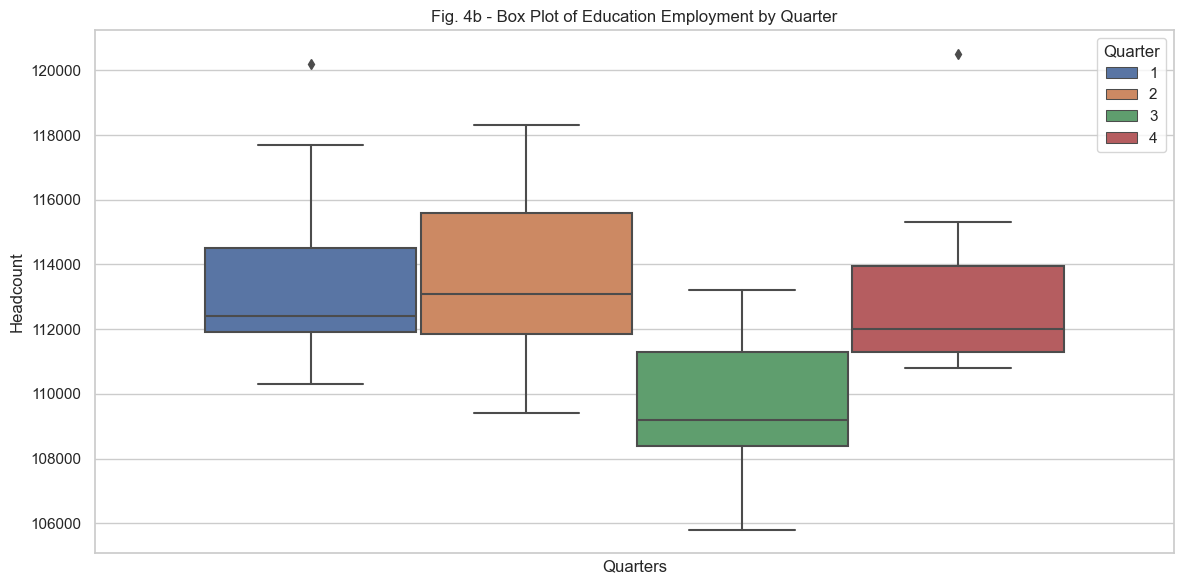

In [19]:
# setting style of seaborn
sns.set(style="whitegrid")

# creating a box plot for each of the quarters
plt.figure(figsize=(12, 6))
sns.boxplot(data=educ_EmpIe, x='Sub_Sector', y='VALUE', hue=educ_EmpIe['Quarter'].dt.quarter)#grouping by quarters
plt.title('Fig. 4b - Box Plot of Education Employment by Quarter')
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.xticks([])  # removing x ticks
plt.tight_layout()
plt.legend(title='Quarter')
plt.show()

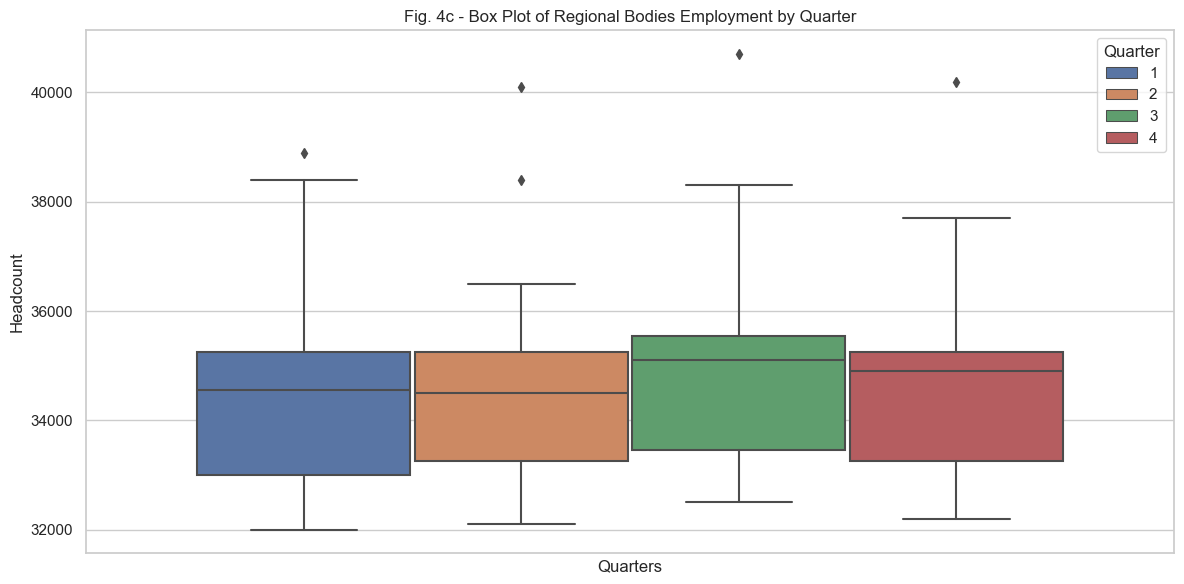

In [20]:
# setting style of seaborn
sns.set(style="whitegrid")

# creating a box plot for each of the quarters
plt.figure(figsize=(12, 6))
sns.boxplot(data=regBod_EmpIe, x='Sub_Sector', y='VALUE', hue=regBod_EmpIe['Quarter'].dt.quarter)#grouping by quarters
plt.title('Fig. 4c - Box Plot of Regional Bodies Employment by Quarter')
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.xticks([])  # removing x ticks
plt.tight_layout()
plt.legend(title='Quarter')
plt.show()

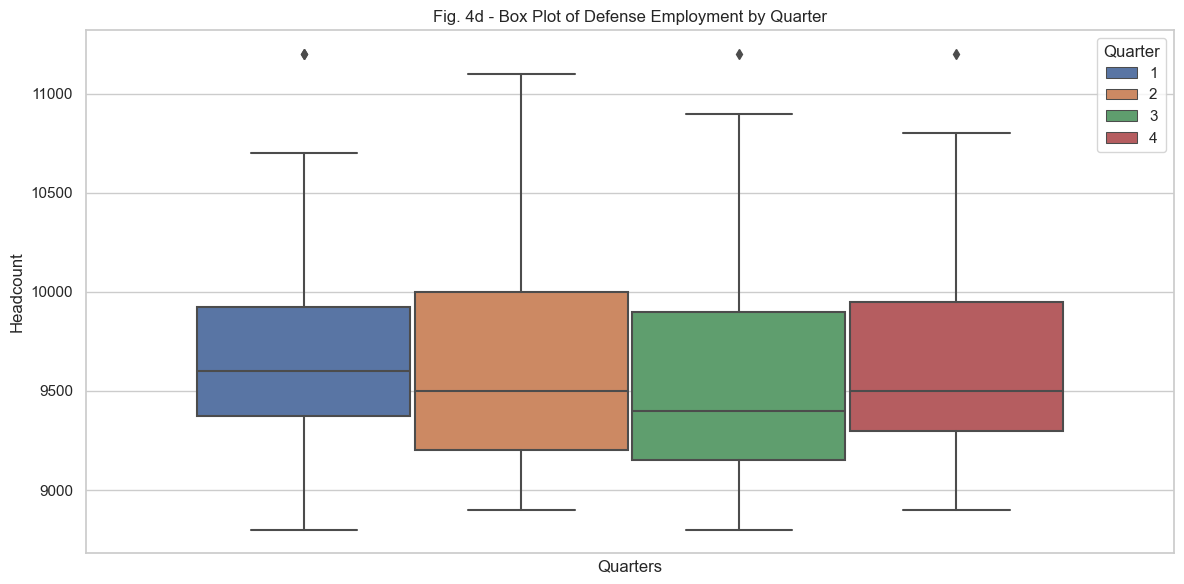

In [21]:
# setting style of seaborn
sns.set(style="whitegrid")

# creating a box plot for each of the quarters
plt.figure(figsize=(12, 6))
sns.boxplot(data=defen_EmpIe, x='Sub_Sector', y='VALUE', hue=defen_EmpIe['Quarter'].dt.quarter)#grouping by quarters
plt.title('Fig. 4d - Box Plot of Defense Employment by Quarter')
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.xticks([])  # removing x ticks
plt.tight_layout()
plt.legend(title='Quarter')
plt.show()

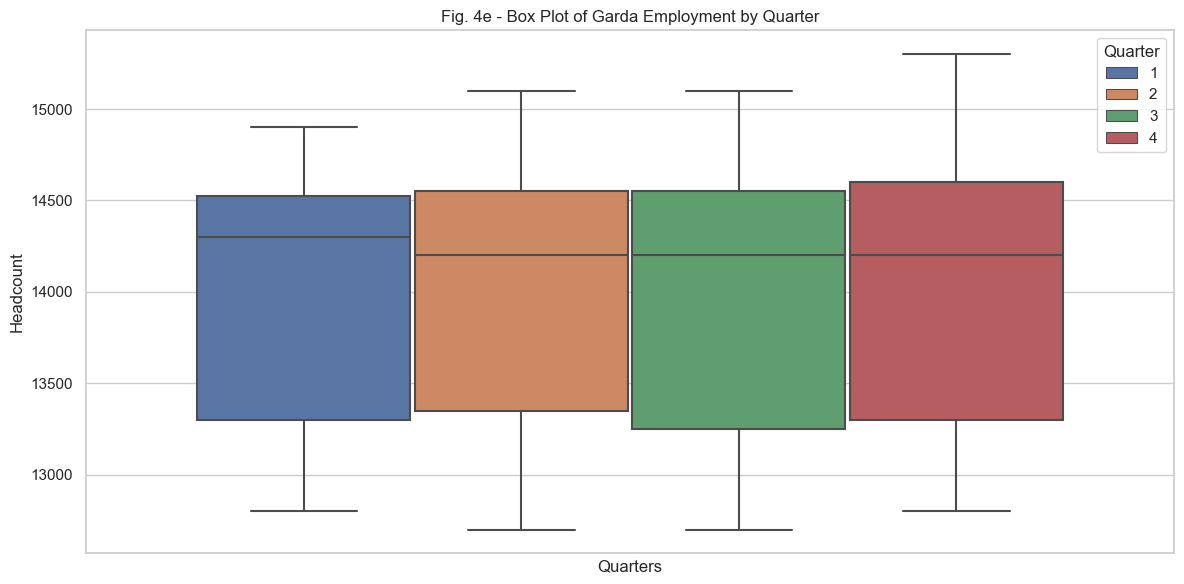

In [22]:
# setting style of seaborn
sns.set(style="whitegrid")

# creating a box plot for each of the quarters
plt.figure(figsize=(12, 6))
sns.boxplot(data=garda_EmpIe, x='Sub_Sector', y='VALUE', hue=garda_EmpIe['Quarter'].dt.quarter)#grouping by quarters
plt.title('Fig. 4e - Box Plot of Garda Employment by Quarter')
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.xticks([])  # removing x ticks
plt.tight_layout()
plt.legend(title='Quarter')
plt.show()

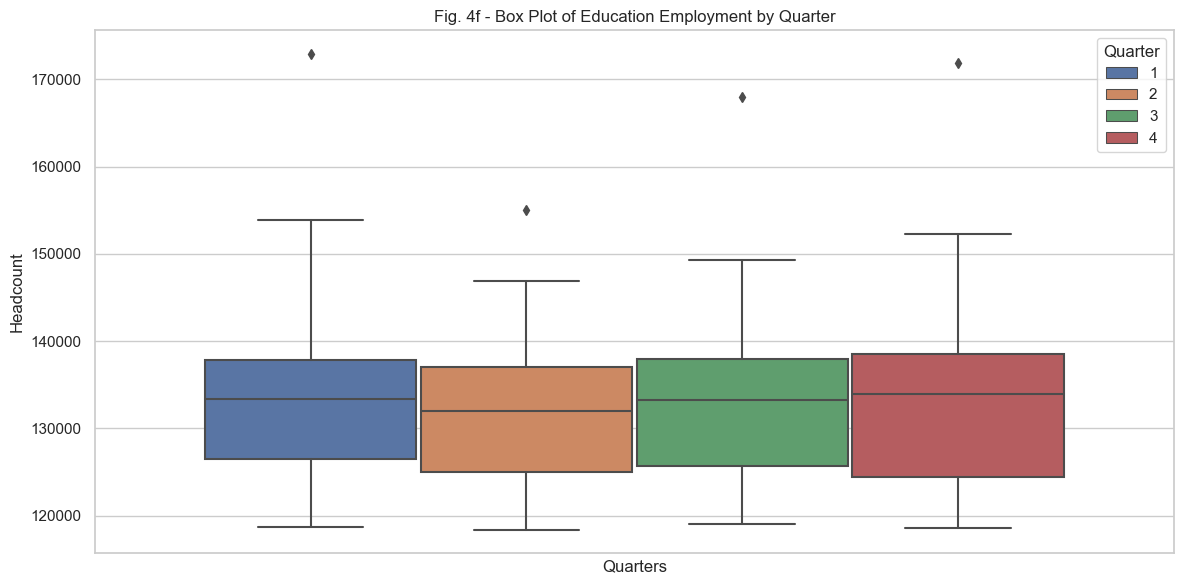

In [23]:
# setting style of seaborn
sns.set(style="whitegrid")

# creating a box plot for each of the quarters
plt.figure(figsize=(12, 6))
sns.boxplot(data=healthEmpIe, x='Sub_Sector', y='VALUE', hue=healthEmpIe['Quarter'].dt.quarter)#grouping by quarters
plt.title('Fig. 4f - Box Plot of Education Employment by Quarter')
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.xticks([])  # removing xtick
plt.tight_layout()
plt.legend(title='Quarter')
plt.show()

#### Irish earnings

In [24]:
#creating df with average weekly earnings
earningsIe = dfIe[dfIe['Statistic_Label'] == 'Average Weekly Earnings']
earningsIe

,Statistic_Label,Quarter,Sub_Sector,UNIT,VALUE
671,Average Weekly Earnings,2008-01-01,Civil service,Euro,918.03
672,Average Weekly Earnings,2008-01-01,Defence,Euro,843.53
673,Average Weekly Earnings,2008-01-01,Garda Siochana,Euro,1182.62
674,Average Weekly Earnings,2008-01-01,Education,Euro,892.52
675,Average Weekly Earnings,2008-01-01,Regional bodies,Euro,963.45
...,...,...,...,...,...
1337,Average Weekly Earnings,2023-01-01,Semi-State companies,Euro,1155.26
1338,Average Weekly Earnings,2023-01-01,Commercial Semi-State companies,Euro,1169.49
1339,Average Weekly Earnings,2023-01-01,Non commercial Semi-State companies,Euro,1125.43
1340,Average Weekly Earnings,2023-01-01,Total Public Sector including Semi State bodies,Euro,1103.31


In [25]:
earningsIe['Sub_Sector'].unique()

array(['Civil service', 'Defence', 'Garda Siochana', 'Education',
       'Regional bodies', 'Health', 'Semi-State companies',
       'Commercial Semi-State companies',
       'Non commercial Semi-State companies',
       'Total Public Sector including Semi State bodies',
       'Total Public Sector excluding Semi State bodies'], dtype=object)

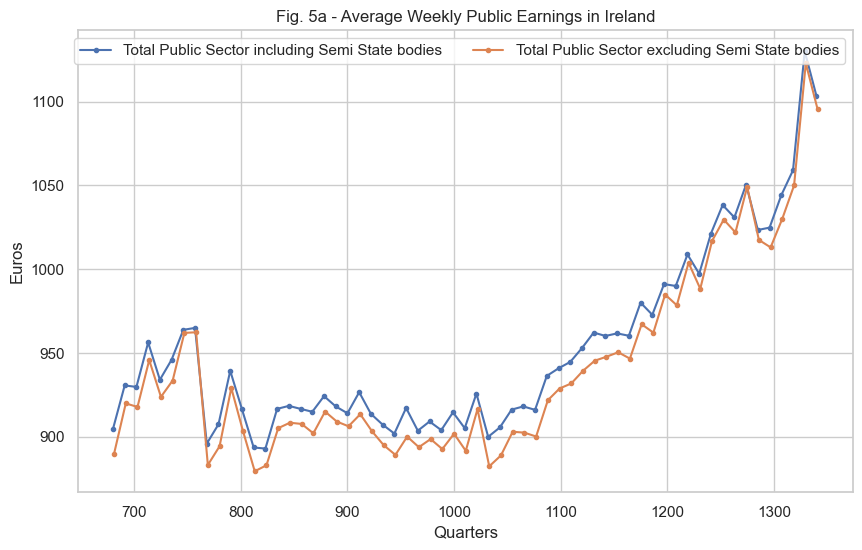

In [26]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining group with total figures
totalsEarnIE_group = ['Total Public Sector including Semi State bodies', 'Total Public Sector excluding Semi State bodies']

# looping through the group created 
for subsector in totalsEarnIE_group:
    df_subsector = earningsIe[earningsIe['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(df_subsector.index, df_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Euros')
plt.title('Fig. 5a - Average Weekly Public Earnings in Ireland')
plt.grid(True) # showing grid for easier readability 

# Put the legend in the background
ax.legend(loc='best', ncol=2) # bbox_to_anchor takes the legend out of the plot

# Show the plot
plt.show()

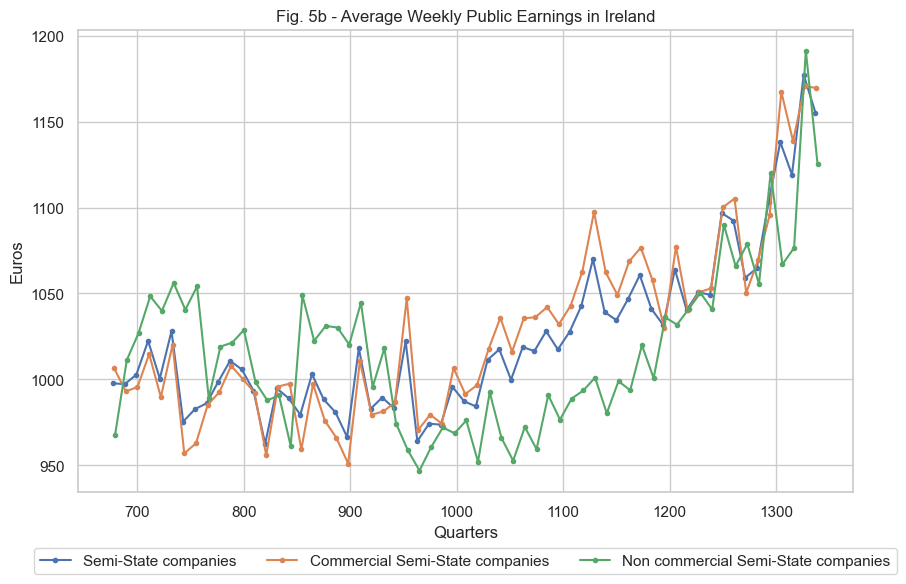

In [27]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining semi-state companies group
semiState_group = ['Semi-State companies', 'Commercial Semi-State companies', 'Non commercial Semi-State companies']

# looping through semiState_group 
for subsector in semiState_group:
    df_subsector = earningsIe[earningsIe['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(df_subsector.index, df_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Euros')
plt.title('Fig. 5b - Average Weekly Public Earnings in Ireland')
plt.grid(True) # showing grid for easier readability 

# Put the legend in the background
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3) # bbox_to_anchor takes the legend out of the plot

# Show the plot
plt.show()

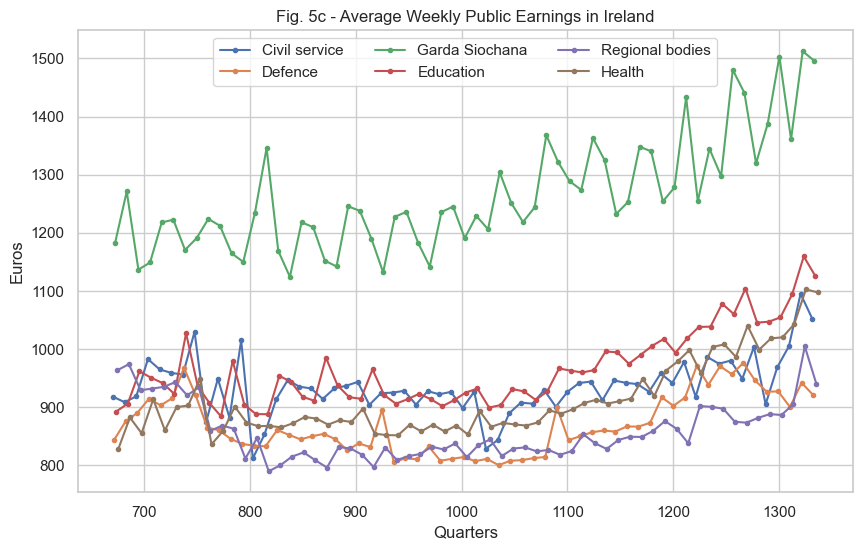

In [28]:
# creating figure and axes with a suitable size
plt.figure(figsize=(10, 6))
ax = plt.gca() # get current axis instance on the current figure

# defining subsectors
subsectors = ['Civil service', 'Defence', 'Garda Siochana', 'Education', 'Regional bodies', 'Health']

#Looping through the Sub_Sectors in the group 
for subsector in subsectors:
    dfIe_subsector = earningsIe[earningsIe['Sub_Sector'] == subsector]
    # plotting each line on the same axes
    ax.plot(dfIe_subsector.index, dfIe_subsector['VALUE'], marker='.', label=subsector) #Added a marker to represent each value (quarter)

# Set labels and title for the plot
plt.xlabel('Quarters')
plt.ylabel('Euros')
plt.title('Fig. 5c - Average Weekly Public Earnings in Ireland')
plt.grid(True)

# Put the legend in the background
ax.legend(loc='upper center', ncol=3)

plt.show()

## Time series

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import ParameterGrid
import itertools
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Total Public Sector Employment

In [30]:
# setting quarter as index 
dfIe_employment.index = pd.to_datetime(dfIe_employment['Quarter'])

In [31]:
# selecting data
totalEmpIE = dfIe_employment[dfIe_employment['Sub_Sector'] == 'Total Public Sector including Semi State bodies']['VALUE']

In [32]:
totalEmpIE

Quarter
2008-01-01    417000.0
2008-04-01    421400.0
2008-07-01    417100.0
2008-10-01    427300.0
2009-01-01    421200.0
                ...   
2022-01-01    424200.0
2022-04-01    429700.0
2022-07-01    439700.0
2022-10-01    447200.0
2023-01-01    450000.0
Name: VALUE, Length: 61, dtype: float64

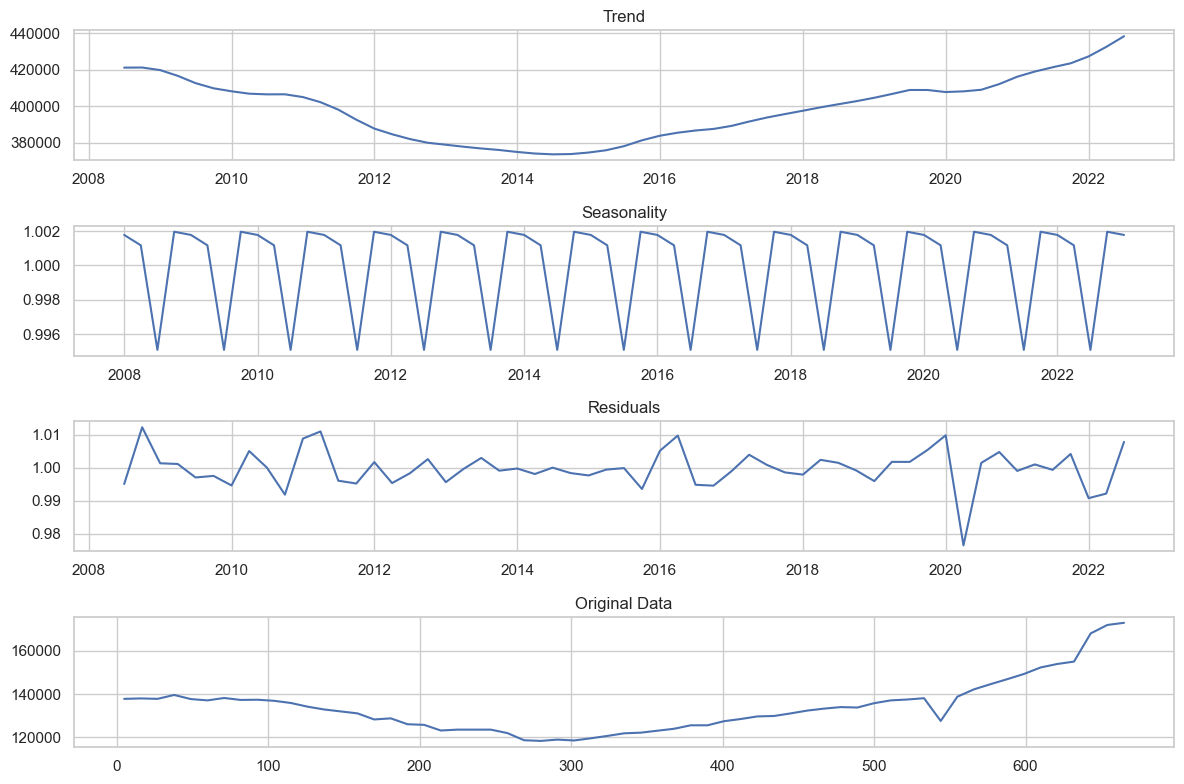

In [33]:
# time series decomposition
result = seasonal_decompose(totalEmpIE, model='multiplicative')

# plotting the components: trend, seasonality, and residuals
plt.figure(figsize=(12, 8))

#trend
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

#seasonality
plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')

#residuals
plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals')

#source data
plt.subplot(4, 1, 4)
plt.plot(healthEmpIe['VALUE'])
plt.title('Original Data')

plt.tight_layout()
plt.show()

In [34]:
#defining order parameters for ARIMA (p, d, q)
p, d, q = 1, 1, 1

# seasonal order parameters for SARIMA (P, D, Q, s)
P, D, Q, s = 1, 1, 1, 4  # quarterly data (s=4)

In [36]:
# fitting ARIMA
arimaModel = ARIMA(totalEmpIE, order=(p, d, q))
arimaFit = arimaModel.fit()

C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [37]:
# fitting SARIMA
sarima_model = SARIMAX(totalEmpIE, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()

C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [38]:
# specifying the possible values of the order values for grid search
p_values = range(0, 3)  
d_values = range(0, 3)  
q_values = range(0, 3) 

# seasonal order values
P_values = range(0, 3) 
D_values = range(0, 3)
Q_values = range(0, 3)  
s_values = [4]  # quarterly range -> 4

In [39]:
# list of parameter combinations for the search
param_grid_arima = list(ParameterGrid({'p': p_values, 'd': d_values, 'q': q_values}))
param_grid_sarima = list(ParameterGrid({'P': P_values, 'D': D_values, 'Q': Q_values, 's': s_values}))

best_arima_aic = float('inf') # keeping track of the lowest AIC value. Positive infinity [float('inf')] to ensure lower value
best_arima_params = None # storing best parameters for the model

best_sarima_aic = float('inf')
best_sarima_params = None

In [40]:
#grid search for ARIMA. Iterations with for loop 
for params in param_grid_arima:
    arima_model = ARIMA(totalEmpIE, order=(params['p'], params['d'], params['q']))
    arima_fit = arima_model.fit()
    if arima_fit.aic < best_arima_aic:
        best_arima_aic = arima_fit.aic
        best_arima_params = params

C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred fre

C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelih

In [41]:
# grid search for SARIMA
for params in param_grid_sarima:
    sarima_model = SARIMAX(totalEmpIE, order=(p, d, q), seasonal_order=(params['P'], params['D'], params['Q'], params['s']))
    sarima_fit = sarima_model.fit()
    if sarima_fit.aic < best_sarima_aic:
        best_sarima_aic = sarima_fit.aic
        best_sarima_params = params

C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency 

C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Usi

In [42]:
print("Final ARIMA Parameters:", best_arima_params)
print("Final SARIMA Parameters:", best_sarima_params)

Final ARIMA Parameters: {'d': 1, 'p': 2, 'q': 2}
Final SARIMA Parameters: {'D': 2, 'P': 0, 'Q': 2, 's': 4}


In [43]:
# forecasting with ARIMA
arima_forecast = arima_fit.predict(start=len(totalEmpIE), end=len(totalEmpIE) + 10 - 1, typ='levels') # typ='levels' values returned in original scale

#forecasting with SARIMA
sarima_forecast = sarima_fit.predict(start=len(totalEmpIE), end=len(totalEmpIE) + 10 - 1)

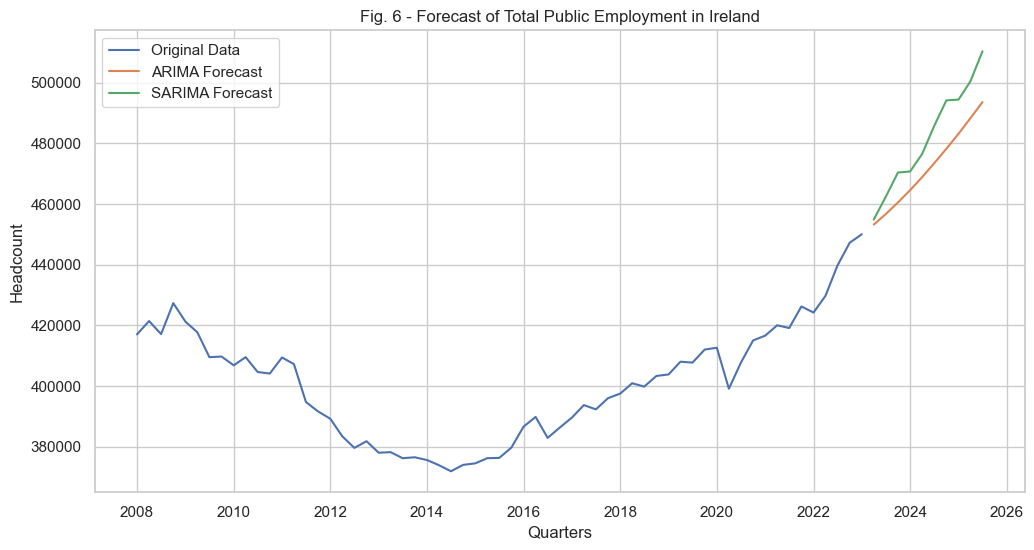

In [44]:
plt.figure(figsize=(12, 6))

#plot of raw data 
plt.plot(totalEmpIE.index, totalEmpIE, label='Original Data')

# ARIMA forecast plot
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast')

# SARIMA plot
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast')

plt.title('Fig. 6 - Forecast of Total Public Employment in Ireland')
plt.xlabel('Quarters')
plt.ylabel('Headcount')
plt.legend()
plt.show()

PERFORMANCE METRICS

In [45]:
# true values
true_values = totalEmpIE

# ensuring lengths from forecast and actual values match
forecast_start = len(totalEmpIE)
forecast_end = forecast_start + len(arima_forecast) - 1
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='Q')
arima_forecast.index = forecast_index
sarima_forecast.index = forecast_indexb

ValueError: Length mismatch: Expected axis has 10 elements, new values have 0 elements

In [50]:
# # calculating metrics
# mae_arima = mean_absolute_error(true_values, arima_forecast)
# mae_sarima = mean_absolute_error(true_values, sarima_forecast)

# mse_arima = mean_squared_error(true_values, arima_forecast)
# mse_sarima = mean_squared_error(true_values, sarima_forecast)

# rmse_arima = np.sqrt(mse_arima)
# rmse_sarima = np.sqrt(mse_sarima)

# # Print metrics
# print("ARIMA Metrics:")
# print("MAE:", mae_arima)
# print("MSE:", mse_arima)
# print("RMSE:", rmse_arima)

# print("\nSARIMA Metrics:")
# print("MAE:", mae_sarima)
# print("MSE:", mse_sarima)
# print("RMSE:", rmse_sarima)

### Health

In [51]:
healthEmpIe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 5 to 665
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Statistic_Label  61 non-null     object        
 1   Quarter          61 non-null     datetime64[ns]
 2   Sub_Sector       61 non-null     object        
 3   UNIT             61 non-null     object        
 4   VALUE            61 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.9+ KB


In [52]:
# Set the index and specify the frequency
healthEmpIe.index = pd.to_datetime(healthEmpIe['Quarter'])

In [53]:
 healthEmpIe

,Statistic_Label,Quarter,Sub_Sector,UNIT,VALUE
Quarter,,,,,
2008-01-01,Employment,2008-01-01,Health,Number,137800.0
2008-04-01,Employment,2008-04-01,Health,Number,138000.0
2008-07-01,Employment,2008-07-01,Health,Number,137800.0
2008-10-01,Employment,2008-10-01,Health,Number,139600.0
2009-01-01,Employment,2009-01-01,Health,Number,137700.0
...,...,...,...,...,...
2022-01-01,Employment,2022-01-01,Health,Number,153900.0
2022-04-01,Employment,2022-04-01,Health,Number,155000.0
2022-07-01,Employment,2022-07-01,Health,Number,168000.0


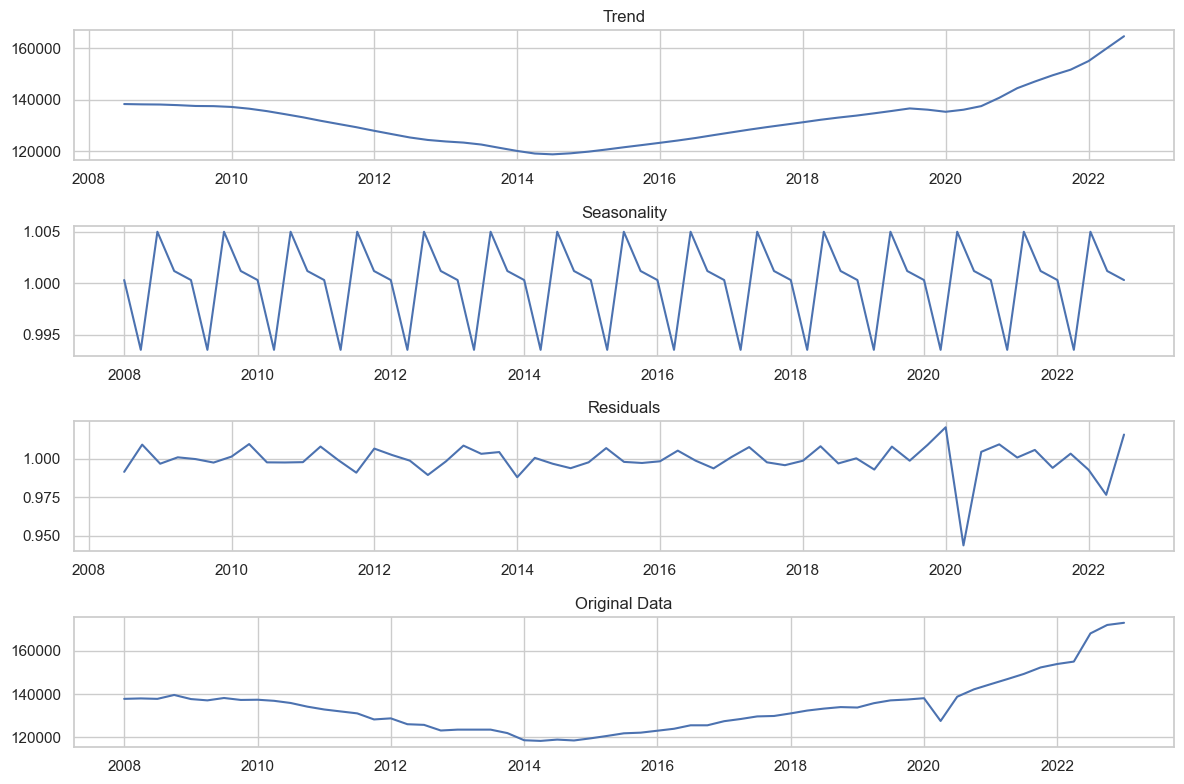

In [54]:
# time series decomposition
result = seasonal_decompose(healthEmpIe['VALUE'], model='multiplicative')

# plotting the components: trend, seasonality, and residuals
plt.figure(figsize=(12, 8))

#trend
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

#seasonality
plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')

#residuals
plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals')

#source data
plt.subplot(4, 1, 4)
plt.plot(healthEmpIe['VALUE'])
plt.title('Original Data')

plt.tight_layout()
plt.show()

#### FORECASTING

In [55]:
#defining order parameters for ARIMA (p, d, q)
p, d, q = 1, 1, 1

# seasonal order parameters for SARIMA (P, D, Q, s)
P, D, Q, s = 1, 1, 1, 4  # quarterly data (s=4)

In [56]:
# fitting ARIMA
arimaModel = ARIMA(healthEmpIe['VALUE'], order=(p, d, q))
arimaFit = arimaModel.fit()

# # fitting SARIMA
# sarima_model = SARIMAX(healthEmpIe['VALUE'], order=(p, d, q), seasonal_order=(P, D, Q, s))
# sarima_fit = sarima_model.fit()

C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\montec3\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invert

### UK data

In [57]:
#selecting target features as a joined list from two ranges
ukColumns=list(range(0, 7)) + list(range(13, 21))

In [58]:
# reading in file, only selected features
dfUKemp = pd.read_csv('./data/pse.csv',skiprows=105,usecols=ukColumns) # taking selected columns only

In [59]:
dfUKemp

,2007 Q4,2704,2944,5648,392,6040,525,59,195,284,1259,1641,1444,355,803
0,2008 Q1,2704,2940,5643,365,6009,518,56,194,286,1233,1637,1448,361,792
1,2008 Q2,2713,2933,5646,365,6011,517,55,193,286,1226,1633,1459,360,799
2,2008 Q3,2754,2910,5664,484,6147,517,55,194,287,1206,1637,1493,392,883
3,2008 Q4,2788,2932,5720,732,6452,518,55,193,289,1212,1656,1504,396,1147
4,2009 Q1,2798,2941,5739,702,6442,519,54,196,293,1208,1669,1506,397,1119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022 Q1,3550,2003,5553,194,5747,512,35,158,272,1145,1501,1880,213,544
57,2022 Q2,3550,1995,5545,194,5740,512,34,156,272,1144,1499,1878,213,542
58,2022 Q3,3576,1985,5561,197,5758,513,34,155,274,1143,1494,1900,211,547
59,2022 Q4,3602,1999,5601,198,5799,515,34,153,276,1152,1506,1915,212,551


In [60]:
# assingning names to columns
dfUKemp.columns=['Quarter','Central_Gov','Local_Gov','Total_General_Gov','Total_Public_Corps','Total_Public_Sector','Civil_Service','Construction', 'HM_Forces', 'Police', 'Public_Admin', 'Education', 'NHS', 'Other_Health_&_Social', 'Other_Public_Sector']

In [61]:
dfUKemp

,Quarter,Central_Gov,Local_Gov,Total_General_Gov,Total_Public_Corps,Total_Public_Sector,Civil_Service,Construction,HM_Forces,Police,Public_Admin,Education,NHS,Other_Health_&_Social,Other_Public_Sector
0,2008 Q1,2704,2940,5643,365,6009,518,56,194,286,1233,1637,1448,361,792
1,2008 Q2,2713,2933,5646,365,6011,517,55,193,286,1226,1633,1459,360,799
2,2008 Q3,2754,2910,5664,484,6147,517,55,194,287,1206,1637,1493,392,883
3,2008 Q4,2788,2932,5720,732,6452,518,55,193,289,1212,1656,1504,396,1147
4,2009 Q1,2798,2941,5739,702,6442,519,54,196,293,1208,1669,1506,397,1119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022 Q1,3550,2003,5553,194,5747,512,35,158,272,1145,1501,1880,213,544
57,2022 Q2,3550,1995,5545,194,5740,512,34,156,272,1144,1499,1878,213,542
58,2022 Q3,3576,1985,5561,197,5758,513,34,155,274,1143,1494,1900,211,547
59,2022 Q4,3602,1999,5601,198,5799,515,34,153,276,1152,1506,1915,212,551


In [62]:
dfUKemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Quarter                61 non-null     object
 1   Central_Gov            61 non-null     int64 
 2   Local_Gov              61 non-null     int64 
 3   Total_General_Gov      61 non-null     int64 
 4   Total_Public_Corps     61 non-null     int64 
 5   Total_Public_Sector    61 non-null     int64 
 6   Civil_Service          61 non-null     int64 
 7   Construction           61 non-null     int64 
 8   HM_Forces              61 non-null     int64 
 9   Police                 61 non-null     int64 
 10  Public_Admin           61 non-null     int64 
 11  Education              61 non-null     int64 
 12  NHS                    61 non-null     int64 
 13  Other_Health_&_Social  61 non-null     int64 
 14  Other_Public_Sector    61 non-null     int64 
dtypes: int64(14), object(1)
m

In [63]:
dfUKemp.describe()

,Central_Gov,Local_Gov,Total_General_Gov,Total_Public_Corps,Total_Public_Sector,Civil_Service,Construction,HM_Forces,Police,Public_Admin,Education,NHS,Other_Health_&_Social,Other_Public_Sector
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,3026.508197,2361.360656,5387.836066,392.901639,5780.819672,467.000000,41.557377,169.704918,265.278689,1095.672131,1544.770492,1624.229508,298.655738,740.721311
std,279.851009,351.979452,220.905574,204.695359,363.746776,38.559046,6.642100,17.175898,16.011591,70.445185,74.424099,133.447917,73.017552,218.645080
min,2672.000000,1985.000000,5139.000000,154.000000,5334.000000,416.000000,34.000000,151.000000,245.000000,1000.000000,1461.000000,1448.000000,208.000000,498.000000
25%,2816.000000,2022.000000,5191.000000,198.000000,5483.000000,435.000000,35.000000,156.000000,252.000000,1038.000000,1494.000000,1523.000000,213.000000,549.000000
50%,2895.000000,2255.000000,5281.000000,338.000000,5683.000000,453.000000,40.000000,159.000000,263.000000,1073.000000,1507.000000,1560.000000,301.000000,652.000000
75%,3214.000000,2680.000000,5574.000000,634.000000,6011.000000,508.000000,46.000000,189.000000,276.000000,1145.000000,1637.000000,1689.000000,361.000000,978.000000
max,3643.000000,2941.000000,5783.000000,732.000000,6480.000000,528.000000,56.000000,199.000000,296.000000,1233.000000,1689.000000,1944.000000,405.000000,1147.000000


In [64]:
dfUKemp.describe(include=object)

,Quarter
count,61
unique,61
top,2008 Q1
freq,1


In [65]:
from datetime import datetime

In [66]:
dfUKemp['Quarter'].unique()

array(['2008 Q1', '2008 Q2', '2008 Q3', '2008 Q4', '2009 Q1', '2009 Q2',
       '2009 Q3', '2009 Q4', '2010 Q1', '2010 Q2', '2010 Q3', '2010 Q4',
       '2011 Q1', '2011 Q2', '2011 Q3', '2011 Q4', '2012 Q1', '2012 Q2',
       '2012 Q3', '2012 Q4', '2013 Q1', '2013 Q2', '2013 Q3', '2013 Q4',
       '2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4', '2015 Q1', '2015 Q2',
       '2015 Q3', '2015 Q4', '2016 Q1', '2016 Q2', '2016 Q3', '2016 Q4',
       '2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4', '2018 Q1', '2018 Q2',
       '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4',
       '2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', '2021 Q1', '2021 Q2',
       '2021 Q3', '2021 Q4', '2022 Q1', '2022 Q2', '2022 Q3', '2022 Q4',
       '2023 Q1'], dtype=object)

In [67]:
# Function to convert Year/Quarter to datetime
def to_datetimeCustom(value):
    year, *quarter = value.split(' ') #quarter holds the string after the white space
    quarter_num = int(quarter[0][1]) 
    month = (quarter_num - 1) * 3 + 1 # calculating the starting month of the quarter 
    return pd.to_datetime(f'{year}-{month:02d}-01')

In [68]:
# Convert the 'Year/Quarter' column to datetime
dfUKemp['Quarter'] = dfUKemp['Quarter'].apply(to_datetimeCustom)

In [69]:
dfUKemp['Quarter']

0    2008-01-01
1    2008-04-01
2    2008-07-01
3    2008-10-01
4    2009-01-01
        ...    
56   2022-01-01
57   2022-04-01
58   2022-07-01
59   2022-10-01
60   2023-01-01
Name: Quarter, Length: 61, dtype: datetime64[ns]

#### UK earnings

In [70]:
# initial view
pd.read_csv('data/emp.csv',skiprows=7,header=None) 

,0,1,2,3,4,5,6,7,8,9,...,449,450,451,452,453,454,455,456,457,458
0,2000,89.2,NaN,NaN,405.0,88.3,NaN,NaN,426.0,NaN,...,311.0,NaN,311.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,92.0,NaN,NaN,417.0,91.5,NaN,NaN,442.0,NaN,...,328.0,NaN,328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,94.1,NaN,NaN,427.0,93.0,NaN,NaN,449.0,NaN,...,340.0,NaN,340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,96.0,NaN,NaN,436.0,94.7,NaN,NaN,457.0,NaN,...,357.0,NaN,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,98.1,NaN,NaN,445.0,97.4,NaN,NaN,470.0,NaN,...,372.0,NaN,372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2023 JAN,103.9,-2.4,-2.3,471.0,104.5,-2.9,-3.0,505.0,5.8,...,620.0,5.8,616.0,5.8,NaN,NaN,NaN,NaN,NaN,NaN
837,2023 FEB,104.0,-2.0,-2.2,472.0,104.8,-2.3,-3.1,506.0,6.7,...,620.0,5.4,616.0,5.4,NaN,NaN,NaN,NaN,NaN,NaN
838,2023 MAR,104.0,-1.6,-2.0,472.0,105.2,-3.2,-2.8,508.0,5.8,...,620.0,5.5,617.0,5.5,NaN,NaN,NaN,NaN,NaN,NaN
839,2023 APR,104.4,-0.1,-1.2,474.0,105.0,0.0,-1.8,507.0,7.8,...,624.0,6.1,620.0,6.1,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# loading headers only to view the nearly 500 column names
headers = pd.read_csv('data/emp.csv',nrows=0) 

In [72]:
# printing names horizontally along with index with a for loop
for idx, header in enumerate(headers, start=0):
    print(f"{idx}. {header}")

0. Title
1. AWE: Whole Economy Real Terms Index: Seasonally Adjusted Regular Pay
2. AWE: Whole Economy Real Terms Year on Year Single Month Growth (%): Seasonally Adjusted Regular Pay
3. AWE: Whole Economy Real Terms Year on Year three Month Growth (%): Seasonally Adjusted Regular Pay
4. AWE: Whole Economy Real Terms Level (£): Seasonally Adjusted Regular Pay
5. AWE: Whole Economy Real Terms Index: Seasonally Adjusted Total Pay
6. AWE: Whole Economy Real Terms Year on Year Single Month Growth (%): Seasonally Adjusted Total Pay
7. AWE: Whole Economy Real Terms Year on Year Three Month Growth (%): Seasonally Adjusted Total Pay
8. AWE: Whole Economy Real Terms Level (£): Seasonally Adjusted Total Pay
9. AWE: Whole Economy Year on Year Single Month Growth (%): Non Seasonally Adjusted Total Pay Excluding Arrears
10. AWE: Manufacturing Year on Year Single Month Growth (%): Non Seasonally Adjusted Total Pay Excluding Arrears
11. AWE: Construction Year on Year Single Month Growth (%): Non Seas

In [73]:
#selecting target features as a joined list from two ranges
ukColumns2=[0,276,279,282,285,415,455]

In [74]:
dfUKemp

,Quarter,Central_Gov,Local_Gov,Total_General_Gov,Total_Public_Corps,Total_Public_Sector,Civil_Service,Construction,HM_Forces,Police,Public_Admin,Education,NHS,Other_Health_&_Social,Other_Public_Sector
0,2008-01-01,2704,2940,5643,365,6009,518,56,194,286,1233,1637,1448,361,792
1,2008-04-01,2713,2933,5646,365,6011,517,55,193,286,1226,1633,1459,360,799
2,2008-07-01,2754,2910,5664,484,6147,517,55,194,287,1206,1637,1493,392,883
3,2008-10-01,2788,2932,5720,732,6452,518,55,193,289,1212,1656,1504,396,1147
4,2009-01-01,2798,2941,5739,702,6442,519,54,196,293,1208,1669,1506,397,1119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-01-01,3550,2003,5553,194,5747,512,35,158,272,1145,1501,1880,213,544
57,2022-04-01,3550,1995,5545,194,5740,512,34,156,272,1144,1499,1878,213,542
58,2022-07-01,3576,1985,5561,197,5758,513,34,155,274,1143,1494,1900,211,547
59,2022-10-01,3602,1999,5601,198,5799,515,34,153,276,1152,1506,1915,212,551


In [75]:
# reading in file, only selected features
dfUKearn = pd.read_csv('./data/emp.csv',skiprows=7,usecols=ukColumns2) # taking selected columns only

In [76]:
# assingning names to columns
dfUKearn.columns=['Date','Public_Admin','Education','Health_&_Soc','Arts_&_Ent','Historic','Public_Sector']
dfUKearn

,Date,Public_Admin,Education,Health_&_Soc,Arts_&_Ent,Historic,Public_Sector
0,2001,379.0,278.0,342.0,316.0,331.0,NaN
1,2002,392.0,288.0,358.0,331.0,344.0,NaN
2,2003,413.0,305.0,375.0,340.0,360.0,NaN
3,2004,428.0,316.0,398.0,356.0,376.0,NaN
4,2005,461.0,327.0,418.0,357.0,396.0,NaN
...,...,...,...,...,...,...,...
835,2023 JAN,661.0,510.0,658.0,542.0,624.0,NaN
836,2023 FEB,661.0,509.0,674.0,557.0,630.0,NaN
837,2023 MAR,665.0,509.0,661.0,548.0,628.0,NaN
838,2023 APR,668.0,522.0,668.0,548.0,633.0,NaN


In [77]:
dfUKearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           840 non-null    object 
 1   Public_Admin   396 non-null    float64
 2   Education      396 non-null    float64
 3   Health_&_Soc   396 non-null    float64
 4   Arts_&_Ent     396 non-null    float64
 5   Historic       396 non-null    float64
 6   Public_Sector  120 non-null    float64
dtypes: float64(6), object(1)
memory usage: 46.1+ KB


In [78]:
# creating a separate df for public sector since this data is not gathered per quarters, only monthly :)
public_SectorUK = dfUKearn.loc[439:558, ['Date', 'Public_Sector']].copy()

In [79]:
public_SectorUK['Date'].unique()

array(['1990 JAN', '1990 FEB', '1990 MAR', '1990 APR', '1990 MAY',
       '1990 JUN', '1990 JUL', '1990 AUG', '1990 SEP', '1990 OCT',
       '1990 NOV', '1990 DEC', '1991 JAN', '1991 FEB', '1991 MAR',
       '1991 APR', '1991 MAY', '1991 JUN', '1991 JUL', '1991 AUG',
       '1991 SEP', '1991 OCT', '1991 NOV', '1991 DEC', '1992 JAN',
       '1992 FEB', '1992 MAR', '1992 APR', '1992 MAY', '1992 JUN',
       '1992 JUL', '1992 AUG', '1992 SEP', '1992 OCT', '1992 NOV',
       '1992 DEC', '1993 JAN', '1993 FEB', '1993 MAR', '1993 APR',
       '1993 MAY', '1993 JUN', '1993 JUL', '1993 AUG', '1993 SEP',
       '1993 OCT', '1993 NOV', '1993 DEC', '1994 JAN', '1994 FEB',
       '1994 MAR', '1994 APR', '1994 MAY', '1994 JUN', '1994 JUL',
       '1994 AUG', '1994 SEP', '1994 OCT', '1994 NOV', '1994 DEC',
       '1995 JAN', '1995 FEB', '1995 MAR', '1995 APR', '1995 MAY',
       '1995 JUN', '1995 JUL', '1995 AUG', '1995 SEP', '1995 OCT',
       '1995 NOV', '1995 DEC', '1996 JAN', '1996 FEB', '1996 M

The data for public sector covers 10 years and it doesn't match the Irish time frame, UK is from 1990 to 1999 whereas the data from Ireland starts from 2008 onwards. So this feature cannot be compared

In [80]:
# dropping the 'Public_Sector' column from the df due to the high rate of NaNs
dfUKearn = dfUKearn.drop(columns=['Public_Sector'])

In [81]:
# dropping rows with NaNs
dfUKearn = dfUKearn.dropna()
len(dfUKearn)

396

In [82]:
# checking no dates repeated
len(dfUKearn['Date'].unique())

396

In [83]:
# checking no dates repeated
dfUKearn['Date'].unique()

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2000 Q1',
       '2000 Q2', '2000 Q3', '2000 Q4', '2001 Q1', '2001 Q2', '2001 Q3',
       '2001 Q4', '2002 Q1', '2002 Q2', '2002 Q3', '2002 Q4', '2003 Q1',
       '2003 Q2', '2003 Q3', '2003 Q4', '2004 Q1', '2004 Q2', '2004 Q3',
       '2004 Q4', '2005 Q1', '2005 Q2', '2005 Q3', '2005 Q4', '2006 Q1',
       '2006 Q2', '2006 Q3', '2006 Q4', '2007 Q1', '2007 Q2', '2007 Q3',
       '2007 Q4', '2008 Q1', '2008 Q2', '2008 Q3', '2008 Q4', '2009 Q1',
       '2009 Q2', '2009 Q3', '2009 Q4', '2010 Q1', '2010 Q2', '2010 Q3',
       '2010 Q4', '2011 Q1', '2011 Q2', '2011 Q3', '2011 Q4', '2012 Q1',
       '2012 Q2', '2012 Q3', '2012 Q4', '2013 Q1', '2013 Q2', '2013 Q3',
       '2013 Q4', '2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4', '2015 Q1',
       '2015 Q2', '2015 Q3', '2015 Q4', '2016 Q1', '2016 Q2', 

Checking the rows showing quarters, same as the Irish data

In [84]:
dfUKearn.query('Date == "2008 Q1"')

,Date,Public_Admin,Education,Health_&_Soc,Arts_&_Ent,Historic
54,2008 Q1,495.0,349.0,473.0,400.0,429.0


In [85]:
dfUKearn.query('Date == "2023 Q1"')

,Date,Public_Admin,Education,Health_&_Soc,Arts_&_Ent,Historic
114,2023 Q1,662.0,509.0,664.0,549.0,627.0


In [86]:
dfUKearnQ = dfUKearn.iloc[54:115]

In [87]:
def to_datetimeCustom2(date_str):
    year, quarter = date_str.split(' ') #quarter holds the string after the white space
    quarter_num = int(quarter[1])
    month = (quarter_num - 1) * 3 + 1   # calculating the starting month of the quarter
    return pd.to_datetime(f'{year}-{month:02d}-01')

In [88]:
# Convert the 'Year/Quarter' column to datetime using .loc
dfUKearnQ.loc[:, 'Date'] = dfUKearnQ['Date'].apply(to_datetimeCustom2)

C:\Users\montec3.EUROPE\AppData\Local\Temp\ipykernel_20140\2770128183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUKearnQ.loc[:, 'Date'] = dfUKearnQ['Date'].apply(to_datetimeCustom2)


In [89]:
dfUKearnQ

,Date,Public_Admin,Education,Health_&_Soc,Arts_&_Ent,Historic
54,2008-01-01,495.0,349.0,473.0,400.0,429.0
55,2008-04-01,496.0,354.0,478.0,411.0,441.0
56,2008-07-01,502.0,358.0,492.0,425.0,441.0
57,2008-10-01,505.0,368.0,491.0,412.0,446.0
58,2009-01-01,512.0,361.0,494.0,397.0,442.0
...,...,...,...,...,...,...
110,2022-01-01,632.0,482.0,632.0,524.0,594.0
111,2022-04-01,632.0,480.0,628.0,538.0,595.0
112,2022-07-01,644.0,485.0,650.0,538.0,606.0
113,2022-10-01,680.0,531.0,650.0,549.0,631.0


In [90]:
# GBP to Euro annual average exchange rates according to https://www.ofx.com/en-ie/forex-news/historical-exchange-rates/yearly-average-rates/
exchangeRates = {
    2008: 1.259467,
    2009: 1.12246,
    2010: 1.165737,
    2011: 1.15258,
    2012: 1.233263,
    2013: 1.177964,
    2014: 1.240494,
    2015: 1.377982,
    2016: 1.224833,
    2017: 1.141317,
    2018: 1.130081,
    2019: 1.139727,
    2020: 1.124569,
    2021: 1.162995,
    2022: 1.173295,
    2023: 1.14396
}

In [91]:
# function to apply the currency exchange per row of the df
def GBPtoEUR(row):
    year = row['Date'].year # taking the year from the entire date
    exchangeRate = exchangeRates.get(year, 1)  # default to 1 in case an exchange rate was missing
    row['Public_Admin'] = row['Public_Admin'] * exchangeRate # GBP value multiplied by the average exchange rate for that year
    row['Education'] = row['Education'] * exchangeRate
    row['Health_&_Soc'] = row['Health_&_Soc'] * exchangeRate
    row['Arts_&_Ent'] = row['Arts_&_Ent'] * exchangeRate
    row['Historic'] = row['Historic'] * exchangeRate
    return row

In [92]:
# applying the conversion function to the df
dfUKearnEur = dfUKearnQ.apply(GBPtoEUR, axis=1)
dfUKearnEur

,Date,Public_Admin,Education,Health_&_Soc,Arts_&_Ent,Historic
54,2008-01-01,623.436165,439.553983,595.727891,503.786800,540.311343
55,2008-04-01,624.695632,445.851318,602.025226,517.640937,555.424947
56,2008-07-01,632.252434,450.889186,619.657764,535.273475,555.424947
57,2008-10-01,636.030835,463.483856,618.398297,518.900404,561.722282
58,2009-01-01,574.699520,405.208060,554.495240,445.616620,496.127320
...,...,...,...,...,...,...
110,2022-01-01,741.522440,565.528190,741.522440,614.806580,696.937230
111,2022-04-01,741.522440,563.181600,736.829260,631.232710,698.110525
112,2022-07-01,755.601980,569.048075,762.641750,631.232710,711.016770
113,2022-10-01,797.840600,623.019645,762.641750,644.138955,740.349145


In [93]:
# setting index
dfUKearnEur = dfUKearnEur.set_index('Date')

Comparison between countries

In [94]:
#selecting columns from the df of each country
earningsIe_selected = earningsIe[earningsIe['Sub_Sector'].isin(['Health', 'Education'])]
dfUKearnEur_selected = dfUKearnEur[['Health_&_Soc', 'Education']]

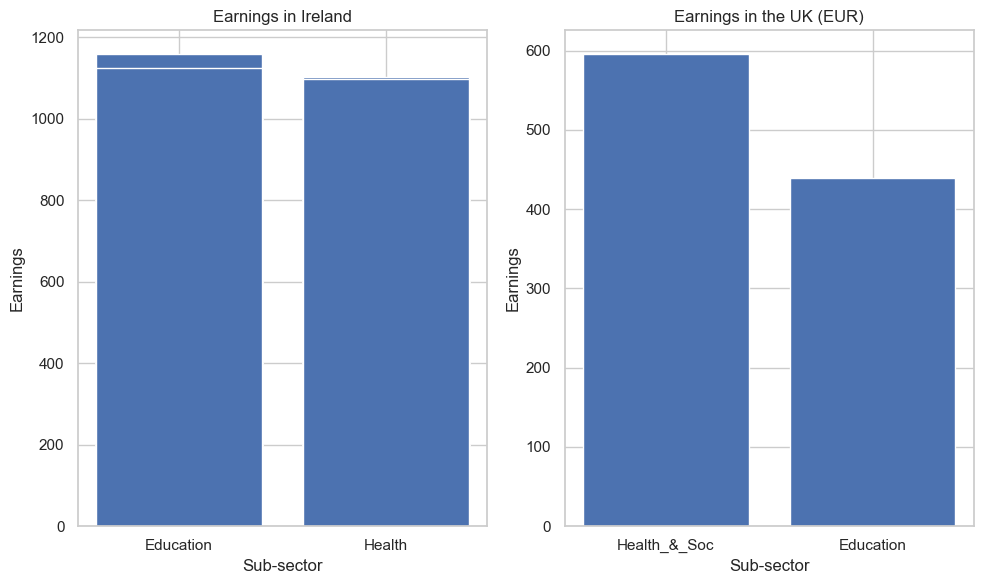

In [95]:
# plotting data
plt.figure(figsize=(10, 6))

# for Irish df
plt.subplot(1, 2, 1)
plt.bar(earningsIe_selected['Sub_Sector'], earningsIe_selected['VALUE'])
plt.title('Earnings in Ireland')
plt.xlabel('Sub-sector')
plt.ylabel('Earnings')

# for UK data
plt.subplot(1, 2, 2)
plt.bar(dfUKearnEur_selected.columns, dfUKearnEur_selected.iloc[0])
plt.title('Earnings in the UK (EUR)')
plt.xlabel('Sub-sector')
plt.ylabel('Earnings')

plt.tight_layout()
plt.show()

## SPAIN

In [96]:
#!pip install chardet

In [97]:
# Checking the encoding type of the file with chardet due to UnicodeDecodeError 'utf-8' 
import chardet
with open('data/4262bsc.csv', 'rb') as file: # reading the file in binary mode
    raw_data = file.read()

chardet.detect(raw_data) #detecting encoding

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [98]:
dfSP = pd.read_csv('data/4262bsc.csv',encoding="ISO-8859-1",delimiter=';', quotechar='"') #need to specify delimiter and quotechar, to indicate that the fields containing the delimiter character are quoted with double quotes, like one single string
dfSP

,Sexo,Comunidades y Ciudades Autónomas,Tipo de sector,Periodo,Total
0,Ambos sexos,Total Nacional,Empleo público,2023T1,"3.523,9"
1,Ambos sexos,Total Nacional,Empleo público,2022T4,"3.526,2"
2,Ambos sexos,Total Nacional,Empleo público,2022T3,"3.506,2"
3,Ambos sexos,Total Nacional,Empleo público,2022T2,"3.453,9"
4,Ambos sexos,Total Nacional,Empleo público,2022T1,"3.468,2"
...,...,...,...,...,...
5095,Mujeres,19 Melilla,Empleo público,2003T1,"4,3"
5096,Mujeres,19 Melilla,Empleo público,2002T4,"4,1"
5097,Mujeres,19 Melilla,Empleo público,2002T3,"4,5"
5098,Mujeres,19 Melilla,Empleo público,2002T2,"4,0"


In [99]:
dfSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Sexo                              5100 non-null   object
 1   Comunidades y Ciudades Autónomas  5100 non-null   object
 2   Tipo de sector                    5100 non-null   object
 3   Periodo                           5100 non-null   object
 4   Total                             5100 non-null   object
dtypes: object(5)
memory usage: 199.3+ KB


In [100]:
dfSP.describe()

,Sexo,Comunidades y Ciudades Autónomas,Tipo de sector,Periodo,Total
count,5100,5100,5100,5100,5100
unique,3,20,1,85,2386
top,Ambos sexos,Total Nacional,Empleo público,2023T1,"4,1"
freq,1700,255,5100,60,16


In [101]:
dfSP['Periodo'].unique()

array(['2023T1', '2022T4', '2022T3', '2022T2', '2022T1', '2021T4',
       '2021T3', '2021T2', '2021T1', '2020T4', '2020T3', '2020T2',
       '2020T1', '2019T4', '2019T3', '2019T2', '2019T1', '2018T4',
       '2018T3', '2018T2', '2018T1', '2017T4', '2017T3', '2017T2',
       '2017T1', '2016T4', '2016T3', '2016T2', '2016T1', '2015T4',
       '2015T3', '2015T2', '2015T1', '2014T4', '2014T3', '2014T2',
       '2014T1', '2013T4', '2013T3', '2013T2', '2013T1', '2012T4',
       '2012T3', '2012T2', '2012T1', '2011T4', '2011T3', '2011T2',
       '2011T1', '2010T4', '2010T3', '2010T2', '2010T1', '2009T4',
       '2009T3', '2009T2', '2009T1', '2008T4', '2008T3', '2008T2',
       '2008T1', '2007T4', '2007T3', '2007T2', '2007T1', '2006T4',
       '2006T3', '2006T2', '2006T1', '2005T4', '2005T3', '2005T2',
       '2005T1', '2004T4', '2004T3', '2004T2', '2004T1', '2003T4',
       '2003T3', '2003T2', '2003T1', '2002T4', '2002T3', '2002T2',
       '2002T1'], dtype=object)

In [102]:
dfSP['Tipo de sector'].unique()

array(['Empleo público'], dtype=object)

In [103]:
dfSP['Comunidades y Ciudades Autónomas'].unique()

array(['Total Nacional', '01 Andalucía', '02 Aragón',
       '03 Asturias, Principado de', '04 Balears, Illes', '05 Canarias',
       '06 Cantabria', '07 Castilla y León', '08 Castilla - La Mancha',
       '09 Cataluña', '10 Comunitat Valenciana', '11 Extremadura',
       '12 Galicia', '13 Madrid, Comunidad de', '14 Murcia, Región de',
       '15 Navarra, Comunidad Foral de', '16 País Vasco', '17 Rioja, La',
       '18 Ceuta', '19 Melilla'], dtype=object)

In [104]:
dfSp

NameError: name 'dfSp' is not defined

### Tweets scraping

In [ ]:
#!pip install tweepy

In [ ]:
import requests

In [ ]:
import tweepy

In [ ]:
consumer_key = "XXXXXXX" #Your API/Consumer key 
consumer_secret = "XXXXXXX" #Your API/Consumer Secret Key
access_token = "XXXXXXX-XXXXXXX"    #Your Access token key
access_token_secret = "XXXXXXX" #Your Access token Secret key

#Pass in our twitter API authentication key
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)

#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
search_query = '"public sector pay" OR "public sector earnings" place_country:IE -is:retweet'
no_of_tweets = 100

try:
    #The number of tweets we want to retrieved from the search
    tweets = api.search_tweets(q=search_query, lang="en", count=no_of_tweets, tweet_mode ='extended')
    
    #Pulling some attributes from the tweet
    attributes_container = [[tweet.user.name, tweet.created_at, tweet.favorite_count, tweet.source, tweet.full_text] for tweet in tweets]

    #Creation of column list to rename the columns in the dataframe
    columns = ["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"]
    
    #Creation of df
    tweets_df = pd.DataFrame(attributes_container, columns=columns)
except BaseException as e:
    print('Status Failed On,',str(e))

Different method

In [ ]:
bearer_token = 'XXXXXXX'
query = '"public sector pay" place_country:IE'
max_results = 1

In [ ]:
headers = {
    'Authorization': f'Bearer {bearer_token}'
}

params = {
    'query': query,
    'max_results': max_results
}

url = 'https://api.twitter.com/2/tweets/search/recent'

In [ ]:
response = requests.get(url, headers=headers, params=params)
response.json()

Another method

In [ ]:
#!pip install python-dotenv

In [ ]:
from dotenv import dotenv_values

# cargamos tokens del .env file
config = dotenv_values(".env")

In [ ]:
import requests
import json


# setting environment variables
bearer_token = config["BEARER_TOKEN"]

search_url = "https://api.twitter.com/2/tweets/search/recent"

# Optional params: start_time,end_time,since_id,until_id,max_results,next_token,
query_params = {
#     'query': 'from:elonmusk -is:retweet is:verified',
    'query' : '"public sector pay" OR "public sector earnings" place_country:IE -is:retweet', # -is:retweet -> avoids retweets
    "max_results":"3", # number of results we'll get
    'tweet.fields': 'author_id', # con el id del autor podemos buscar por autor
    'user.fields': 'name',
}

In [ ]:
def bearer_oauth(r):
    
    #Method required by bearer token authentication.
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

In [ ]:
# set the query
def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params) # how we set the request itself with .get
    
    return response.json()

# Querying the API
json_response = connect_to_endpoint(search_url, query_params)

In [ ]:
# Parsing the response
parsedRes = json.dumps(json_response, indent=4, sort_keys=True, ensure_ascii=False) # indent 4 to look nice indent. ascii to get emoties etc.
print(parsedRes)

In [ ]:
import tarfile
import json
import bz2
import re

## Filtering tweets from monthly .tar files

In [ ]:
#keywords to filter the tweets
keywords = ['public employment','public sector employment','health employment','education employment','civil service employment', 'defence employment','regional bodies employment','garda employment']

# initializing array which will hold the filtered tweets
filteredTweets=[]


# opening the tar file
with tarfile.open('data/archiveteam-twitter-stream-2013-02.tar', 'r') as tar:
    
    # iterating through all files and directories
    for member in tar.getmembers():
        
        #skipping directories
        if member.isdir():
            continue
        
        #looking for the target files json.bz2
        if member.name.endswith('.json.bz2'):
            
            # extracting each file
            file = tar.extractfile(member)
         
            #reading in and decompressing the file
            noBz2 = bz2.decompress(file.read()).decode('utf-8')
            
            # handling each tweet to find the match
            for line in noBz2.splitlines():
                
                #each line is one tweet in json format, therefore loading line by line
                tweet = json.loads(line)

                # making sure the tweet has the fields 'text' and 'created_at'. If not they'll be skipped
                if 'text' not in tweet or 'created_at' not in tweet or tweet['user']['lang'] != 'en':
                    continue

                # Skipping retweets
                if tweet['text'].startswith('RT') and tweet.get('retweeted_status') is not None:
                    continue
                
                # storing fields if present
                tweetTxt = tweet['text']
                created_at = tweet['created_at']

                # Searching matches in text, splitting by words, lower case like keywords
                if any(keyword in tweetTxt.lower().split() for keyword in keywords):                
                    # Add the matching tweet to the list
                    filteredTweets.append({
                        'text': tweetTxt,
                        'created_at': created_at
                    })
                    

                    
#writting the fields from matching tweets to a json output file
with open('myTweets.json', 'w') as output:
    json.dump(filteredTweets, output)

output json files were empty, just []